In [ ]:
!pip install -r "/content/drive/MyDrive/Colab Notebooks/LEVX_1km/requirements.txt"

In [ ]:
!pip install lazypredict

In [4]:
import plotly.express as px
import pandas as pd
import numpy as np


coor = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LEVX_1km/input_files/distan_lat42.22lon-8.63p2R1Km.csv")
px.set_mapbox_access_token("pk.eyJ1IjoiZ3JhbmFudHVpbiIsImEiOiJja3B4dGU4OTkwMTFmMm9ycnNhMjJvaGJqIn0.VWzx_PkD9A5cSUVsn_ijCA")
px.scatter_mapbox(coor, hover_data=['distance'],lat='lat', lon='lon',color='distance', title="Nearest points",
                           color_continuous_scale=px.colors.cyclical.IceFire,)

**Cloud height in meters. Label more or less than 300 feet**

In [11]:
#cloud height in meters
print("Cloud height in meters")
print(pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LEVX_1km/input_files/LEVX_20192020.csv",
                          usecols = ["time", "skyl1_o","metar_o"],
                          parse_dates=["time"]).set_index("time").sample(100))
station = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LEVX_1km/input_files/LEVX_20192020.csv",
                          usecols = ["time", "skyl1_o"],
                          parse_dates=["time"]).set_index("time")


#clouds height meters to feet
num = pd.to_numeric(station.skyl1_o, errors="coerce")*3.28084

#label more or less than 200 feet
interval = pd.IntervalIndex.from_tuples([(-1, 300),(300,7000)])
labels = ["<=300ft",">300ft"]


station["skyl1_l"] = pd.cut(num, bins=interval,retbins=False,labels=labels)
station["skyl1_l"] = station["skyl1_l"].map({a:b for a,b in zip(interval,labels)})
station["skyl1_l"] = station["skyl1_l"].astype(str).replace("nan","No Cloud")

print("\nStation sample")
print(station.sample(10))

print("\nCloud height frequencies")
print(station["skyl1_l"].value_counts(normalize=True).map(lambda n: '{:.1%}'.format(n)))

Cloud height in meters
                    skyl1_o                                            metar_o
time                                                                          
2020-10-24 05:17:00    61.0  LEVX 240517Z 19009KT 100V210 1000 R19/P2000 R0...
2019-05-16 06:00:00   488.0  LEVX 160600Z 01003KT 320V060 7000 BKN016 BKN02...
2019-01-06 06:00:00       M      LEVX 060600Z 23006KT CAVOK 03/M01 Q1032 NOSIG
2020-04-09 13:00:00    30.0  LEVX 091300Z 20009KT 140V240 2000 1000E BCFG V...
2019-04-20 17:00:00       M  LEVX 201700Z 01014KT 340V040 CAVOK 24/06 Q1015...
...                     ...                                                ...
2018-10-24 10:30:00       M  LEVX 241030Z 21005KT 130V250 CAVOK 17/12 Q1027...
2020-10-06 21:30:00   122.0  LEVX 062130Z VRB01KT 6000 BKN004 BKN012 16/16 ...
2020-07-08 22:00:00       M  LEVX 082200Z 01004KT 320V070 CAVOK 20/17 Q1015...
2019-07-24 09:00:00       M  LEVX 240900Z 18004KT 100V250 CAVOK 22/16 Q1015...
2019-12-16 02:30:00  1036.0  

**Forecast D0**

In [13]:
# forecast d0
model1k = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LEVX_1km/input_files/lat42.22lon-8.63p2R1KmD0.csv",parse_dates=["time"]).drop(columns=["Unnamed: 0"]).set_index("time")
model1k

,dir0,snow_prec0,snowlevel0,mod0,wind_gust0,mslp0,temp0,rh0,visibility0,lhflx0,...,cape1,cin1,cfh1,cfl1,cfm1,cft1,HGT5001,HGT8501,T5001,T8501
time,,,,,,,,,,,,,,,,,,,,,
2019-01-01 01:00:00,143.268921,0.0,1801.360962,0.789023,1.467980,103158.796875,280.410004,0.823894,24135.000000,6.723936,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,5730.042969,1595.621948,253.857193,283.275238
2019-01-01 02:00:00,152.222214,0.0,1766.035156,1.437459,2.645142,103178.460938,279.987000,0.822755,24135.000000,6.389383,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,5729.319824,1597.058472,253.848557,282.842499
2019-01-01 03:00:00,154.053619,0.0,1728.199341,1.304144,2.414089,103142.132812,279.750885,0.820316,24135.000000,6.182112,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,5724.619141,1593.626953,253.876816,282.377808
2019-01-01 04:00:00,162.321548,0.0,1716.658325,1.242218,2.291945,103172.617188,279.614197,0.806320,24135.000000,6.556708,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,5725.305664,1596.243408,253.810440,282.195923
2019-01-01 05:00:00,167.243256,0.0,1718.675293,0.790160,1.460847,103175.796875,279.555634,0.787751,24135.000000,7.131637,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,5724.179199,1596.257935,253.821121,282.136566
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-31 19:00:00,316.116913,0.0,800.844543,5.403949,10.236845,101375.132812,279.880554,0.861849,24050.560547,28.912556,...,22.750000,-12.612812,0.0,0.000000,0.0,0.000000,5360.758301,1434.292603,243.570251,271.706177
2020-12-31 20:00:00,318.488983,0.0,708.539551,4.331174,8.753118,101517.437500,279.643799,0.881646,24048.224609,21.361237,...,34.250000,-4.223125,0.0,0.300000,0.1,0.300000,5362.556641,1437.166504,242.893250,271.008636
2020-12-31 21:00:00,314.300262,0.0,763.025513,3.515929,6.365382,101593.578125,279.461945,0.917659,24056.218750,13.615123,...,30.620001,-5.149188,0.0,0.070246,0.0,0.070246,5366.014160,1441.580811,242.227005,271.706116


In [14]:
df_all1k = pd.concat([station,model1k],axis=1).drop(columns=["skyl1_o"]).dropna()
df_all1k.sample(30)

,skyl1_l,dir0,snow_prec0,snowlevel0,mod0,wind_gust0,mslp0,temp0,rh0,visibility0,...,cape1,cin1,cfh1,cfl1,cfm1,cft1,HGT5001,HGT8501,T5001,T8501
time,,,,,,,,,,,,,,,,,,,,,
2020-09-27 14:00:00,>300ft,347.604248,0.0,2546.179199,4.091794,4.485040,101909.562500,293.548492,0.527134,24135.000000,...,0.000000,5.000000e-04,0.088000,0.000000,0.000000,0.088000,5733.600098,1516.354370,264.793121,281.759064
2019-01-08 08:00:00,No Cloud,166.886353,0.0,1810.954590,1.556624,2.918192,103148.640625,278.186371,0.777186,24135.000000,...,0.000000,0.000000e+00,0.015211,0.000000,0.000000,0.015211,5734.803223,1588.947754,255.206757,283.464264
2019-03-14 16:00:00,No Cloud,300.364990,0.0,1853.345459,3.944533,4.428826,103299.281250,285.202118,0.727601,24135.000000,...,0.000000,2.773438e-05,0.085500,0.000000,0.000000,0.085500,5753.091309,1593.729614,257.220184,281.733826
2019-10-14 01:00:00,<=300ft,144.224442,0.0,1758.616699,2.224376,3.436764,100902.945312,284.606750,0.947369,10645.397461,...,0.000000,-5.468750e-05,0.600000,0.220321,0.414062,0.600000,5509.975098,1427.533081,256.898193,278.124054
2020-12-21 03:00:00,<=300ft,161.288773,0.0,2279.690430,5.150630,9.642597,102338.273438,285.290802,0.992814,24232.509766,...,0.626800,2.578125e-05,0.400000,0.875000,0.843750,0.875000,5687.844727,1533.102661,259.338440,282.154327
2020-06-21 07:00:00,>300ft,153.585571,0.0,2542.095215,1.218296,1.691932,102660.023438,286.533600,0.994367,24036.822266,...,1.031000,-2.603918e+00,0.000000,0.574817,0.000000,0.574817,5789.660645,1559.717041,262.894745,283.940948
2020-10-13 01:00:00,>300ft,314.876617,0.0,2333.982910,1.820454,3.629963,102373.531250,285.648376,1.000000,24044.035156,...,0.000000,-5.468750e-05,0.100000,0.300000,0.000000,0.300000,5738.814453,1542.636963,260.454437,281.819946
2020-02-23 10:00:00,No Cloud,163.636887,0.0,2398.954590,0.945560,1.158214,103331.929688,287.235687,0.550921,24135.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,5791.182617,1623.914185,256.998688,284.588745
2019-04-24 21:00:00,>300ft,256.877289,0.0,599.409302,5.256039,11.032373,100155.484375,281.963257,0.875141,24046.195312,...,408.078369,-2.973848e+00,0.000000,0.058724,0.000000,0.058724,5282.758789,1361.368652,244.074127,273.473694


**Scatter plot significant meteorological variables and skyl1_l**

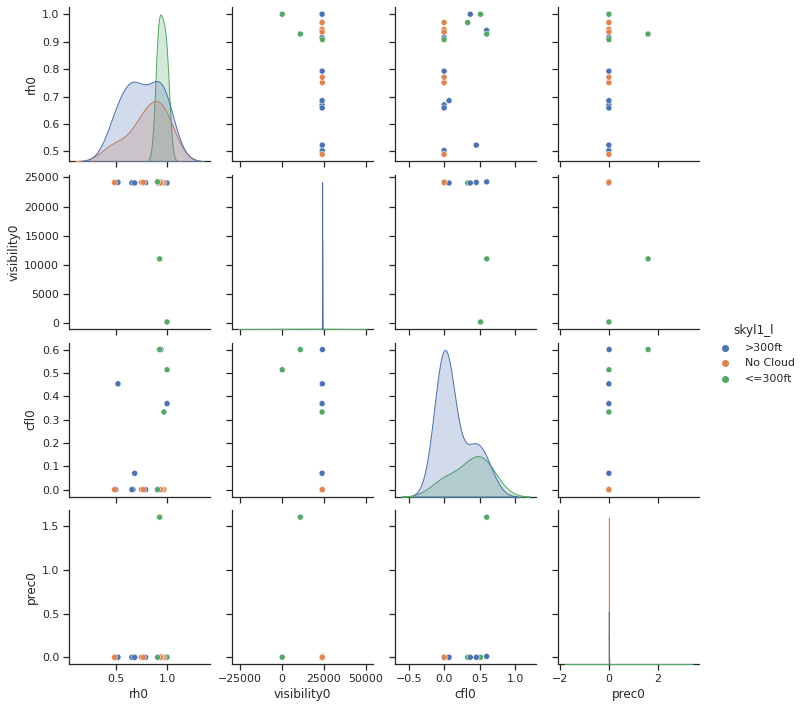

In [20]:
import seaborn as sns

sns.set_theme(style="ticks")

sns.pairplot(df_all1k[["skyl1_l","rh0","visibility0","cfl0","prec0"]].sample(20), hue="skyl1_l");

**Scatter plot 3 PCA variables and skyl1_l**

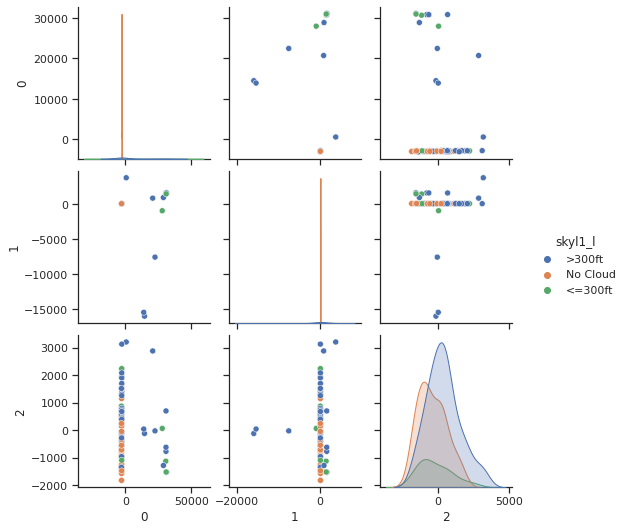

In [21]:
from sklearn.decomposition import PCA

df_pca = pd.DataFrame(PCA(n_components=3).fit_transform(df_all1k.iloc[:,1:]),
                                                        index =df_all1k.index)
df_pca["skyl1_l"] = df_all1k.skyl1_l
sns.pairplot(df_pca.sample(100), hue="skyl1_l");

**Machine learning models. X variables**

In [15]:
df_all1k.iloc[:,1:].columns

Index(['dir0', 'snow_prec0', 'snowlevel0', 'mod0', 'wind_gust0', 'mslp0',
       'temp0', 'rh0', 'visibility0', 'lhflx0', 'lwflx0', 'conv_prec0',
       'prec0', 'swflx0', 'shflx0', 'cape0', 'cin0', 'cfh0', 'cfl0', 'cfm0',
       'cft0', 'HGT5000', 'HGT8500', 'T5000', 'T8500', 'dir1', 'snow_prec1',
       'snowlevel1', 'mod1', 'wind_gust1', 'mslp1', 'temp1', 'rh1',
       'visibility1', 'lhflx1', 'lwflx1', 'conv_prec1', 'prec1', 'swflx1',
       'shflx1', 'cape1', 'cin1', 'cfh1', 'cfl1', 'cfm1', 'cft1', 'HGT5001',
       'HGT8501', 'T5001', 'T8501'],
      dtype='object')

In [16]:
from sklearn.model_selection import train_test_split
import lazypredict
from lazypredict.Supervised import LazyClassifier

# X and Y
Y = df_all1k.skyl1_l
X = df_all1k.iloc[:,1:]


X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, )


multiple_model = LazyClassifier(verbose =0, ignore_warnings = True,predictions=True)
models,predictions = multiple_model.fit(X_train,X_test,y_train,y_test)

100%|██████████| 29/29 [02:21<00:00,  4.89s/it]


In [17]:
models

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
ExtraTreesClassifier,0.85,0.78,None,0.84,2.28
LGBMClassifier,0.83,0.76,None,0.82,3.14
LabelPropagation,0.80,0.76,None,0.80,7.70
LabelSpreading,0.80,0.76,None,0.80,15.46
RandomForestClassifier,0.83,0.76,None,0.82,7.66
KNeighborsClassifier,0.80,0.75,None,0.80,1.21
BaggingClassifier,0.80,0.74,None,0.79,5.44
XGBClassifier,0.79,0.71,None,0.78,11.27
LogisticRegression,0.78,0.70,None,0.77,5.12


**ML LGBMClassifier**

In [32]:
from lightgbm.sklearn import LGBMClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


# X and Y
Y = df_all1k.skyl1_l
X = df_all1k.iloc[:,1:]

# mean accuracy machine learning sample array
acc_ml = []

#seed random function to create TWO RELATED samples of scores
np.random.seed(1)

for t in range (0,10):
  #split variables
  X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.15, )

  ml_model = LGBMClassifier(n_estimators=250).fit(X_train,y_train)
  #ml_model = ExtraTreesClassifier().fit(X_train,y_train)

  y_pred = ml_model.predict(X_test)
  acc_ml.append(round(accuracy_score(y_test, y_pred),2))

  #Confusion matrix
  print("\nConfusion matrix  (Machine Learning)\n")

  cm = pd.crosstab(y_test, ml_model.predict(X_test),margins=True,)
  print(cm)
  #plt.figure(figsize=(12, 9))
  #sns.heatmap(cm,annot=True,cmap="YlGnBu",fmt='.0f');

  #quality report
  print("\nQuality report (Machine Learning)\n")
  print(pd.DataFrame(classification_report(y_test, ml_model.predict(X_test),output_dict=True)).T)


print("\nAccuracy mean of samples: ",acc_ml)



Confusion matrix  (Machine Learning)

col_0     <=300ft  >300ft  No Cloud   All
skyl1_l                                  
<=300ft       194      96        27   317
>300ft         67     895        86  1048
No Cloud        9      69      1028  1106
All           270    1060      1141  2471

Quality report (Machine Learning)

              precision  recall  f1-score  support
<=300ft            0.72    0.61      0.66   317.00
>300ft             0.84    0.85      0.85  1048.00
No Cloud           0.90    0.93      0.91  1106.00
accuracy           0.86    0.86      0.86     0.86
macro avg          0.82    0.80      0.81  2471.00
weighted avg       0.85    0.86      0.85  2471.00

Confusion matrix  (Machine Learning)

col_0     <=300ft  >300ft  No Cloud   All
skyl1_l                                  
<=300ft       214     108        29   351
>300ft         57     868        91  1016
No Cloud        9      77      1018  1104
All           280    1053      1138  2471

Quality report (Machine 

**ML ExtraTreesClassifier**

In [27]:
# X and Y
Y = df_all1k.skyl1_l
X = df_all1k.iloc[:,1:]

# mean accuracy machine learning sample array
acc_ml_ext = []

#seed random function to create TWO RELATED samples of scores
np.random.seed(1)

for t in range (0,10):
  #split variables
  X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.15, )

  #ml_model = LGBMClassifier(n_estimators=250).fit(X_train,y_train)
  ml_model = ExtraTreesClassifier(n_estimators=250).fit(X_train,y_train)

  y_pred = ml_model.predict(X_test)
  acc_ml_ext.append(round(accuracy_score(y_test, y_pred),2))

  #Confusion matrix
  print("\nConfusion matrix  (Machine Learning)\n")

  cm = pd.crosstab(y_test, ml_model.predict(X_test),margins=True,)
  print(cm)
  #plt.figure(figsize=(12, 9))
  #sns.heatmap(cm,annot=True,cmap="YlGnBu",fmt='.0f');

  #quality report
  print("\nQuality report (Machine Learning)\n")
  print(pd.DataFrame(classification_report(y_test, ml_model.predict(X_test),output_dict=True)).T)


print("\nAccuracy mean of samples: ",acc_ml_ext)


Confusion matrix  (Machine Learning)

col_0     <=300ft  >300ft  No Cloud   All
skyl1_l                                  
<=300ft       175     112        30   317
>300ft         43     907        98  1048
No Cloud        5      70      1031  1106
All           223    1089      1159  2471

Quality report (Machine Learning)

              precision  recall  f1-score  support
<=300ft            0.78    0.55      0.65   317.00
>300ft             0.83    0.87      0.85  1048.00
No Cloud           0.89    0.93      0.91  1106.00
accuracy           0.86    0.86      0.86     0.86
macro avg          0.84    0.78      0.80  2471.00
weighted avg       0.85    0.86      0.85  2471.00

Confusion matrix  (Machine Learning)

col_0     <=300ft  >300ft  No Cloud   All
skyl1_l                                  
<=300ft       191     136        36   363
>300ft         42     885       107  1034
No Cloud        4      62      1008  1074
All           237    1083      1151  2471

Quality report (Machine 

**T test two related samples. This is a test for the null hypothesis that two related samples have identical accuracy means. Alternative hypothesis the mean of the distribution underlying the sample with LGBMClassifier is less than the mean of the distribution underlying the sample with ExtraTreesClassifier. Significance level (alpha) = 0.01**

In [29]:
from scipy import stats

alpha = 0.01
sta, p_value = stats.ttest_rel(acc_ml, acc_ml_ext, alternative="less")

print("\nAccuracy with LGBMClassifier:", acc_ml)
print("\nAccuracy with ExtraTreesClassifier:", acc_ml_ext)

print("\nalpha: ",alpha)

print("\np_value point: ",p_value)
if p_value < alpha:    
    print("\nwe are rejecting null hypothesis  H0: accuracy LGBMClassifier = accuracy ExtraTreesClassifier")
    print("\nwe are accepting alternative hypothesis:   accuracy LGBMClassifieris less than accuracy ExtraTreesClassifier")
else:
    print("\nwe are accepting null hypothesis:  H0: accuracy LGBMClassifier = accuracy ExtraTreesClassifier")


Accuracy with LGBMClassifier: [0.85, 0.84, 0.84, 0.84, 0.83, 0.83, 0.84, 0.83, 0.84, 0.83]

Accuracy with ExtraTreesClassifier: [0.86, 0.84, 0.84, 0.84, 0.85, 0.83, 0.85, 0.83, 0.84, 0.85]

alpha:  0.01

p_value point:  0.025501630353475382

we are accepting null hypothesis:  H0: accuracy LGBMClassifier = accuracy ExtraTreesClassifier


**Add time variables**

In [30]:
df_all1k["hour"] = df_all1k.index.hour
df_all1k["month"] = df_all1k.index.month
df_all1k["dayofyear"] = df_all1k.index.dayofyear
df_all1k["weekofyear"] = df_all1k.index.isocalendar().week.astype(int)

In [31]:
df_all1k.iloc[:,1:].columns

Index(['dir0', 'snow_prec0', 'snowlevel0', 'mod0', 'wind_gust0', 'mslp0',
       'temp0', 'rh0', 'visibility0', 'lhflx0', 'lwflx0', 'conv_prec0',
       'prec0', 'swflx0', 'shflx0', 'cape0', 'cin0', 'cfh0', 'cfl0', 'cfm0',
       'cft0', 'HGT5000', 'HGT8500', 'T5000', 'T8500', 'dir1', 'snow_prec1',
       'snowlevel1', 'mod1', 'wind_gust1', 'mslp1', 'temp1', 'rh1',
       'visibility1', 'lhflx1', 'lwflx1', 'conv_prec1', 'prec1', 'swflx1',
       'shflx1', 'cape1', 'cin1', 'cfh1', 'cfl1', 'cfm1', 'cft1', 'HGT5001',
       'HGT8501', 'T5001', 'T8501', 'hour', 'month', 'dayofyear',
       'weekofyear'],
      dtype='object')

In [33]:
# X and Y
Y = df_all1k.skyl1_l
X = df_all1k.iloc[:,1:]

# mean accuracy machine learning sample array
acc_ml_t = []

#seed random function to create TWO RELATED samples of scores
np.random.seed(1)

for t in range (0,10):
  #split variables
  X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.15, )

  ml_model = LGBMClassifier(n_estimators=250).fit(X_train,y_train)
  #ml_model = ExtraTreesClassifier().fit(X_train,y_train)

  y_pred = ml_model.predict(X_test)
  acc_ml_t.append(round(accuracy_score(y_test, y_pred),2))

  #Confusion matrix
  print("\nConfusion matrix  (Machine Learning)\n")

  cm = pd.crosstab(y_test, ml_model.predict(X_test),margins=True,)
  print(cm)
  #plt.figure(figsize=(12, 9))
  #sns.heatmap(cm,annot=True,cmap="YlGnBu",fmt='.0f');

  #quality report
  print("\nQuality report (Machine Learning)\n")
  print(pd.DataFrame(classification_report(y_test, ml_model.predict(X_test),output_dict=True)).T)


print("\nAccuracy mean of samples: ",acc_ml_t)


Confusion matrix  (Machine Learning)

col_0     <=300ft  >300ft  No Cloud   All
skyl1_l                                  
<=300ft       194      96        27   317
>300ft         67     895        86  1048
No Cloud        9      69      1028  1106
All           270    1060      1141  2471

Quality report (Machine Learning)

              precision  recall  f1-score  support
<=300ft            0.72    0.61      0.66   317.00
>300ft             0.84    0.85      0.85  1048.00
No Cloud           0.90    0.93      0.91  1106.00
accuracy           0.86    0.86      0.86     0.86
macro avg          0.82    0.80      0.81  2471.00
weighted avg       0.85    0.86      0.85  2471.00

Confusion matrix  (Machine Learning)

col_0     <=300ft  >300ft  No Cloud   All
skyl1_l                                  
<=300ft       214     108        29   351
>300ft         57     868        91  1016
No Cloud        9      77      1018  1104
All           280    1053      1138  2471

Quality report (Machine 

**T test two related samples. This is a test for the null hypothesis that two related samples have identical accuracy means. Alternative hypothesis the accuracy of the distribution underlying the sample without time variables is less than the accuracy of the distribution underlying the sample with time variables. Significance level (alpha) = 0.01**

In [34]:

alpha = 0.01
sta, p_value = stats.ttest_rel(acc_ml, acc_ml_t, alternative="less")

print("\nAccuracy without time variables:", acc_ml)
print("\nAccuracy with time variables:", acc_ml_t)

print("\nalpha: ",alpha)

print("\np_value point: ",p_value)
if p_value < alpha:    
    print("\nwe are rejecting null hypothesis  H0: accuracy machine learning without time variables = accuracy machine learning with time variables")
    print("\nwe are accepting alternative hypothesis: the accuracy of the sample without time variables inputs is less than the accuracy of the sample with time variables inputs")
else:
    print("\nwe are accepting null hypothesis:  H0: accuracy accuracy machine learning without time variables = accuracy machine learning with time variables ")



Accuracy without time variables: [0.86, 0.85, 0.85, 0.85, 0.85, 0.85, 0.85, 0.85, 0.85, 0.85]

Accuracy with time variables: [0.86, 0.85, 0.85, 0.85, 0.85, 0.85, 0.85, 0.85, 0.85, 0.85]

alpha:  0.01

p_value point:  nan

we are accepting null hypothesis:  H0: accuracy accuracy machine learning without time variables = accuracy machine learning with time variables 


In [35]:
import pickle
from sklearn.pipeline import Pipeline

estimators = [('ml_model', ml_model)]
pipe = Pipeline(estimators)
print(pipe)
al_file={"x_var":X.columns,"coor":coor,"pipe":pipe}
pickle.dump(al_file, open("skyl1_LEVX_1km_time_d0.al", 'wb'))

Pipeline(steps=[('ml_model', LGBMClassifier(n_estimators=250))])
